# Text To Speech Demo

## Info

In [1]:
# Import modules
from utils.ImageHandeling import BasicImageHandeling as bh
from utils.TextToSpeechFromImage import TextToSpeech as tts
from utils.RectangleUI import RectangleDrawer

In [2]:
image_path = 'assets/DEMO_image.jpg'
image = bh.read_image(image_path)

In [3]:
bh.save_output_image(image, # Check data folder for success
                     image_name='roi_rect.jpg') # Default

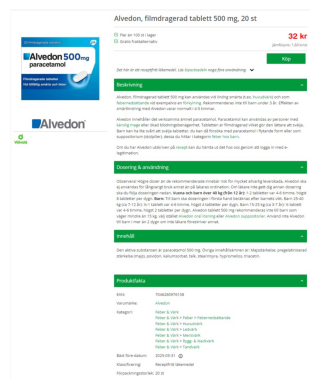

In [4]:
bh.show_image(image)

### Find Dominant Colors

In [5]:
cols = bh.find_dominant_colors(image) # output is rgb

In [6]:
cols

array([[252, 253, 253],
       [  7, 142,  60],
       [ 69, 126, 152]])

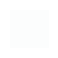

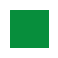

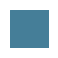

In [7]:
# Display the colors:
for i in cols:
    bh.display_color(i) # Input is rgb

### Find Title

In [8]:
biggest_title = tts.extract_biggest_title(image)
biggest_title

'Alvedon'

## Create ROIs

### Divide Image By Coordinates (ROI)

In [9]:
# TODO: Extra? Create a method that takes the entire image and provides context for the summarized text.

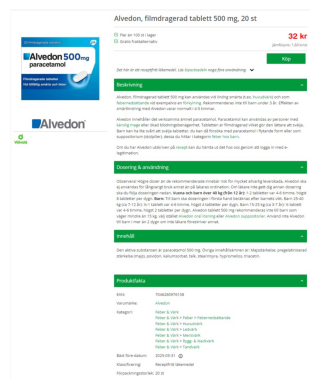

In [10]:
bh.show_image(image)

In [11]:
image_txt = tts.extract_text_from_image(image)
print(image_txt)

Alvedon, filmdragerad tablett 500 mg, 20 st
(Z Fler än 100 st i lager 32 kr
20 lmdragerade tablette os (Z Gratis fraktalternativ
ä0a S Jämförpris: 1,60 kelst
HAlvedon 500mg
paracetamol
Det här ör ett receptfritt läkemedel. Läs bipacksedeln noga före användning.
Filmdragerade tabletter
vid tilltällig smärta och teber SN Beskrivning d
Alvedon, filmdragerad tablett 500 mg kan användas vid lindrig smärta (t.ex. huvudvärk) och som
febernedsättande vid exempelvis en förkylning. Rekommenderas inte till barn under 3 år. Effekten av
smärtlindring med Alvedon varar normalt i 4-5 timmar.
ä Alvedon innehåller det verksamma ämnet paracetamol. Paracetamol kan användas av personer med
'Alvedon känslig mage eller ökad blödningsbenägenhet. Tabletten är filmdragerad vilket gör den lättare att svälja.
Barn kan ha Iite svårt att svälja tabletter, du kan då försöka med paracetamol i flytande form eller som
2 suppositorium (stolpiller), dessa du hittar i kategorin feber hos barn.
välvald
Om du har Alvedon u

In [12]:
tts.extract_biggest_title(image)

'Alvedon'

### Use module RectangleUI to gain coords + roi images

In [13]:
# # NOTE : To user, for this DEMO, only define 2 ROIs for the code to work.
#           You can also skip this step and input the ROI coords manually.

drawer = RectangleDrawer(image_path)
# Run the window (UI)
drawer.start_window()
# Draw
drawer.draw_rectangle()

drawer.wait_for_input()

In [14]:
# Get the coords of the rectangles
coords = drawer.get_rectangle_coordinates()
print(coords)

[(435, 295, 610, 486, 175, 191), (647, 196, 764, 281, 117, 85)]


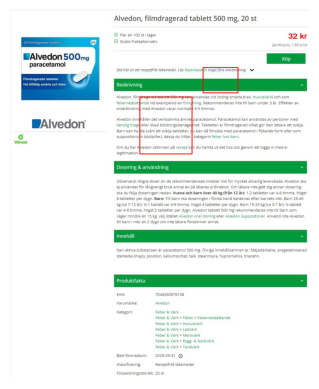

In [15]:
# Optional : get an image showing the rectangles on the image (To ensure the input)
image_with_rectangle = drawer.get_image_with_rectangles() # Extra
bh.show_image(image_with_rectangle)

In [16]:
bh.save_output_image(image_with_rectangle, # Check data folder for success
                     image_name='roi_rect.jpg') # Default

In [17]:
images = drawer.get_roi_images(coords)

image_1, image_2 = images # NOTE: Only Define as many images as you have!

images

[array([[[255, 240, 235],
         [233, 230, 246],
         [ 71,  71,  87],
         ...,
         [255, 255, 234],
         [255, 253, 243],
         [255, 255, 255]],
 
        [[255, 234, 238],
         [223, 209, 227],
         [ 95,  87, 104],
         ...,
         [255, 255, 234],
         [255, 255, 247],
         [255, 255, 255]],
 
        [[255, 234, 243],
         [245, 234, 254],
         [111, 110, 126],
         ...,
         [255, 255, 232],
         [255, 255, 247],
         [254, 254, 254]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [18]:
print(image_1) # First ROI image

[[[255 240 235]
  [233 230 246]
  [ 71  71  87]
  ...
  [255 255 234]
  [255 253 243]
  [255 255 255]]

 [[255 234 238]
  [223 209 227]
  [ 95  87 104]
  ...
  [255 255 234]
  [255 255 247]
  [255 255 255]]

 [[255 234 243]
  [245 234 254]
  [111 110 126]
  ...
  [255 255 232]
  [255 255 247]
  [254 254 254]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


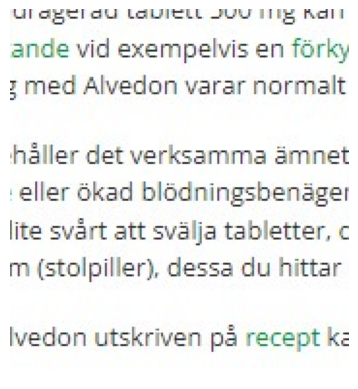

In [19]:
# Show the first ROI image
bh.show_image(image_1)

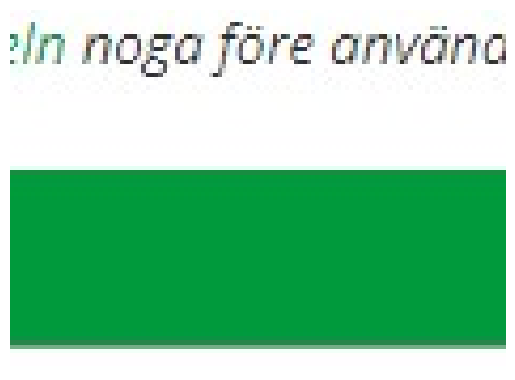

In [20]:
bh.show_image(image_2)

## Text To Speech

### Prepare Text

In [21]:
# NOTE: Change the following variable to switch between images/rois:

test_roi = image_1

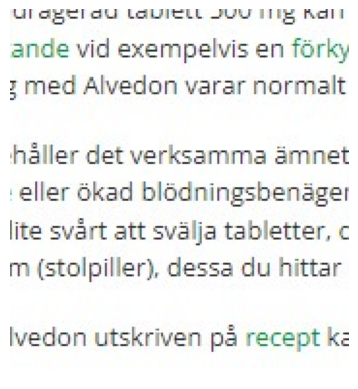

In [22]:
bh.show_image(test_roi)

In [23]:
# Test Getting titles:
tts.extract_biggest_title(test_roi)

'Alvedon'

In [24]:
# Extract text 
test_roi_text = tts.extract_text_from_image(test_roi)
print(test_roi_text)

T PEE oa SIS SYS SA DED a V FRD A
ande vid exempelvis en förky
; med Alvedon varar normalt
håller det verksamma ämnet
eller ökad blödningsbenäger
ite svårt att svälja tabletter, c
m (stolpiller), dessa du hittar
vedon utskriven på recept ka



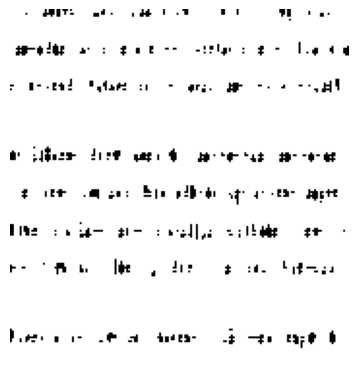

In [25]:
# Enhance before
test_roi_enhanced = tts.enhance_image(test_roi)

# Optimal : Show the enchanced image that the computer 'sees' visually.
bh.show_image(test_roi_enhanced)

In [26]:
# Extract from enhanced :
enhanced_test_roi_text = tts.extract_text_from_image(test_roi)
print(enhanced_test_roi_text)

T PEE oa SIS SYS SA DED a V FRD A
ande vid exempelvis en förky
; med Alvedon varar normalt
håller det verksamma ämnet
eller ökad blödningsbenäger
ite svårt att svälja tabletter, c
m (stolpiller), dessa du hittar
vedon utskriven på recept ka



In [27]:
# Difference
enhanced_test_roi_text == test_roi_text

True

### Translate Text

In [28]:
# swe -> eng # TODO: Optional to translate
# tts.translate_text(enhanced_image_1_text,'en')
# ocument the laguage change
# Language is default swedish , code : '--oem 3 --psm 6 -l swe'
# Currently input is swe, but output is eng

### Summarize Text

In [29]:
summarized_text = tts.summarize_text(enhanced_test_roi_text,
                                     max_char=300, # Default
                                     summary_div=3) # Default

In [30]:
print(summarized_text) # TODO: Format better

The text discusses the use of Alvedon for pain relief, including its duration and potential side effects. It also mentions alternative forms, such as suppositories, for those who have difficulty swallowing tablets. Alvedon is available by prescription.


In [31]:
len(enhanced_test_roi_text)/len(summarized_text)
# amount of characters are reduced by following nr :
# Compare it to the passed division to analyze sucess

0.9563492063492064

In [32]:
from utils.TextToSpeechFromImage import count_words
# Se wordcount:
sen_len , sen = count_words(summarized_text,
                            ret_words = True) # Default False
print(sen_len)

37


In [33]:
# If you want access to the split words, pass ret_words=True (default False)
sen

['The',
 'text',
 'discusses',
 'the',
 'use',
 'of',
 'Alvedon',
 'for',
 'pain',
 'relief,',
 'including',
 'its',
 'duration',
 'and',
 'potential',
 'side',
 'effects.',
 'It',
 'also',
 'mentions',
 'alternative',
 'forms,',
 'such',
 'as',
 'suppositories,',
 'for',
 'those',
 'who',
 'have',
 'difficulty',
 'swallowing',
 'tablets.',
 'Alvedon',
 'is',
 'available',
 'by',
 'prescription.']

### Read Out Text/Summary

In [34]:
tts.read_text(summarized_text)